console.txt

```
0: [31719.00, 33052.00, 30655.00, 29834.00, 31921.00, 31704.00, 29493.00, 31121.00, 32630.00, 30279.00, 29983.00, 32571.00, 31457.00, 29089.00, 31324.00, 32383.00]
1: [1289.83, 1571.46, 1191.52, 1284.93, 1485.04, 1100.76, 1856.35, 888.37, 2076.86, 803.43, 2292.47, 749.66, 2007.09, 888.54, 1788.86, 1095.81]
2: [4048.19, 3632.96, 4201.09, 3717.78, 4246.75, 3776.73, 3997.60, 4007.42, 3783.30, 4167.25, 3639.40, 4416.80, 3527.53, 4654.50, 3498.63, 4799.78]
3: [4681.64, 3504.76, 4586.47, 3379.78, 4581.97, 3500.48, 4581.76, 3732.13, 4495.86, 3861.64, 4516.18, 3993.66, 4402.73, 4149.30, 4239.61, 4332.50]
4: [1303.78, 1363.06, 1468.58, 1487.09, 1325.71, 1619.45, 1130.65, 1714.51, 947.84, 1768.40, 745.58, 1773.36, 816.03, 1732.58, 1092.46, 1684.32]
5: [573.82, 1240.97, 372.65, 1151.74, 658.99, 1069.12, 842.81, 881.24, 1068.13, 611.77, 1149.24, 527.91, 1216.00, 207.38, 1285.50, 91.26]
6: [1076.32, 260.30, 1167.03, 292.41, 1132.41, 135.89, 1074.38, 256.83, 992.97, 565.20, 699.58, 781.31, 538.20, 991.23, 207.03, 1109.89]
7: [1064.32, 1358.14, 1019.62, 1524.31, 928.31, 1738.32, 995.49, 1796.58, 1166.52, 1815.99, 1165.46, 1830.94, 1106.45, 1724.33, 960.77, 1575.60]
8: [1635.64, 1000.61, 1441.83, 1070.43, 1596.66, 1296.91, 1697.55, 1513.38, 1710.57, 1622.56, 1614.79, 1741.15, 1447.55, 1685.47, 1356.56, 1646.95]
9: [329.88, 736.64, 674.70, 711.67, 408.25, 472.12, 179.19, 338.21, 66.15, 497.79, 343.64, 641.17, 564.64, 730.68, 706.83, 814.76]
10: [576.90, 620.98, 681.41, 598.96, 595.72, 543.89, 430.32, 335.15, 316.95, 145.08, 140.52, 115.93, 211.71, 335.53, 483.62, 525.62]
11: [447.49, 446.61, 486.76, 570.59, 503.61, 654.23, 656.30, 531.87, 650.44, 448.98, 449.02, 265.10, 304.42, 56.22, 185.08, 171.20]
12: [508.28, 529.83, 521.05, 621.49, 492.85, 596.30, 607.13, 494.47, 878.12, 594.36, 964.14, 857.59, 1016.67, 1030.73, 873.48, 1055.65]
13: [933.58, 708.55, 696.22, 570.58, 939.82, 576.42, 1062.33, 769.99, 1036.56, 950.46, 972.35, 1061.85, 889.51, 1041.82, 960.18, 1006.75]
14: [498.17, 477.13, 247.44, 481.09, 398.80, 362.63, 501.90, 132.47, 455.12, 143.29, 375.06, 355.47, 111.11, 452.27, 148.68, 478.74]
15: [197.40, 431.20, 42.29, 396.26, 213.22, 361.58, 224.84, 226.60, 363.68, 99.26, 393.91, 272.73, 236.17, 425.19, 53.49, 436.93]
...
```

## Maximum des Frequency Sweeps auswerten

In [ ]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

SAMPLE_FREQUENCY = 200 * 1000 # 200 kHz
SAMPLE_COUNT = 512

# Set figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16, 9)

# Read file "console.txt"
with open("console.txt", mode="rt") as file:
    k: list[int] = []
    data: list[list[float]] = []

    # Iterate over lines and extract data
    for line in file.readlines():
        k.append(int(line.split(':')[0]))
        dataStr = line[line.index('[') + 1 : line.index(']')].split(',')

        # Initialize data once
        if len(data) < 1:
            data = [[] for i in range(len(dataStr))]

        # Parse floats
        for i, ds in enumerate(dataStr):
            data[i].append( float(dataStr[i]) )

    # Plot the results
    for d in data:
        plt.plot(k, d)

    # Find Peaks
    for i in range(0, len(data)):
        peaks, a = find_peaks(data[i], 10000)
        print(str(i) + str(peaks))

freqs = fftfreq(SAMPLE_COUNT, 1/SAMPLE_FREQUENCY)
print(str(freqs))

In [1]:
from numpy import arange, empty

def fftfreq(n, d=1.0):
    """The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).
    
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.
    """
    val = 1.0 / (n * d)
    results = empty(n, int)
    N = (n-1)//2 + 1
    p1 = arange(0, N, dtype=int)
    results[:N] = p1
    p2 = arange(-(n//2), 0, dtype=int)
    results[N:] = p2
    return results * val

## Experiment with captured data

In [ ]:
import scipy.io
import matplotlib.pyplot as plt

SERVO_LIMITS = [500, 1833]
SERVO_ANGLES = [90, 270]
STEP_SIZE = 10

#FILENAME = 'sensorSweepBartlettWindow.mat'
#FILENAME = 'sensorSweepNoWindow.mat'
FILENAME = 'sensorSweepNew3.mat'

# Set figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16, 9)

mat_data = scipy.io.loadmat(FILENAME)
channel_magnitudes = mat_data['data']
steps = mat_data['steps']
angles = mat_data['degrees'].transpose()
#metadata = mat_data['metadata']

plt.plot(angles, channel_magnitudes)
plt.title(FILENAME)

In [ ]:
from math import isnan

import numpy

# Change figure params
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16, 9)

NUM_CHANNELS = 16

segs_a = []
segs_b = []
segs_c = []
segs_d = []
calculatedAngles = []
x=0

for i in range(0, len(angles)):
	angles[i] = (angles[i] - 0)

def calculateDirection(magnitudes):
	num_channels = len(magnitudes)
	max_chan = 0
	
    # Loop over all channels to find the peak channel
	for i in range(0, num_channels):
		if isnan(magnitudes[max_chan]):
			magnitudes[max_chan] = magnitudes[i]
		if isnan(magnitudes[i]):
			continue

		if magnitudes[i] > magnitudes[max_chan]:
			max_chan = i

	val = magnitudes[max_chan]
	val_cw = magnitudes[(max_chan + 1) % num_channels]
	val_ccw = magnitudes[(max_chan - 1) % num_channels]

	seg_a = val / val_ccw
	seg_b = val_cw / val_ccw
	seg_c = val / val_cw
	seg_d = val_ccw / val_cw

	pieSize = 360/num_channels/2

	segs_a.append(seg_a)
	segs_b.append(seg_b)
	segs_c.append(seg_c)
	segs_d.append(seg_d)

	vorzeichen = -1 if seg_b < seg_d else 1
	OFFSET = 0.85
	return (360/num_channels)*max_chan - pieSize/(seg_b+OFFSET) + pieSize/(seg_d+OFFSET)

for d in mat_data['data']:
	angle = calculateDirection(d)
	calculatedAngles.append(angle)
	x = x + 1

# Labels 
LABELS = [
	"v_m / v_ccw",
	"v_cw / v_ccw",
	"v / v_cw",
	"v_ccw / v_cw"
]

# Plot the segments
plt.plot(angles, numpy.transpose([segs_a, segs_c]), label=[LABELS[0], LABELS[2]], linestyle='dashed')
plt.plot(angles, numpy.transpose([segs_b, segs_d]), label=[LABELS[1], LABELS[3]], linestyle='solid')
#plt.plot(angles, calculatedAngles, label="Ang")
plt.legend()
plt.title(FILENAME)
#plt.ylim(0, 15)
plt.xlim(120, 200)
plt.xlabel('Rotation PCB [deg]')

minAngle = min(angles)
maxAngle = max(angles)

# Generate helper lines at each ir sender location
for i in numpy.linspace(0, 360, num=NUM_CHANNELS + 1): # +1 since there is 0° and 360°
	if i < minAngle or i > maxAngle:
		continue

	plt.axvline(i, linestyle='--', color='#999999', linewidth=0.5) # vertical lines

plt.savefig('sensorSweep3_relations.pdf', format='pdf', bbox_inches="tight")

In [ ]:
from numpy.fft import fftfreq

def fourierBins(n: int, f: float):
    return fftfreq(n, 1/f)


N = 512
SAMPLE_FREQUENCY = 200000
result = fourierBins(N, SAMPLE_FREQUENCY)

i = 128
print(result)
print(result[i:i+1]) 

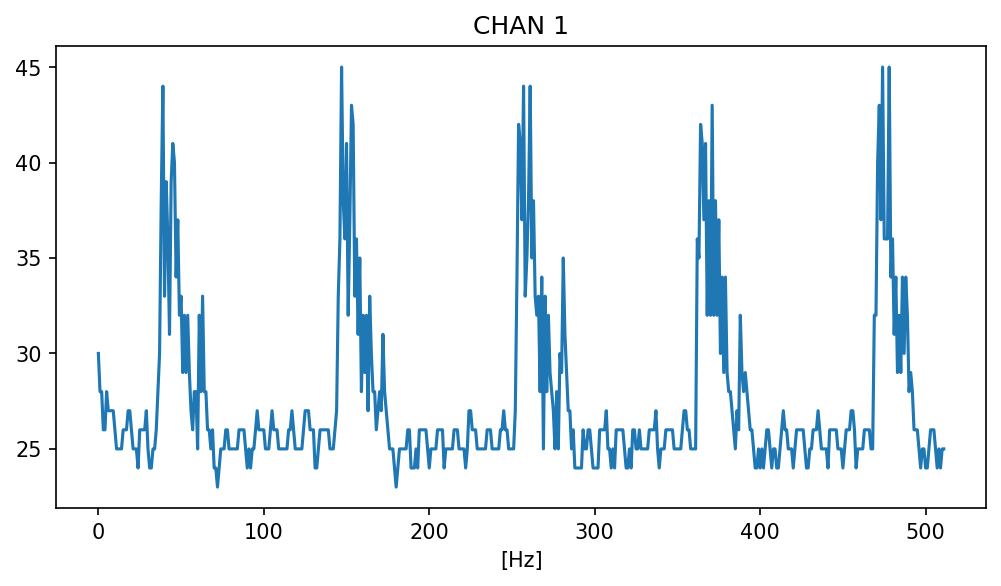

[]


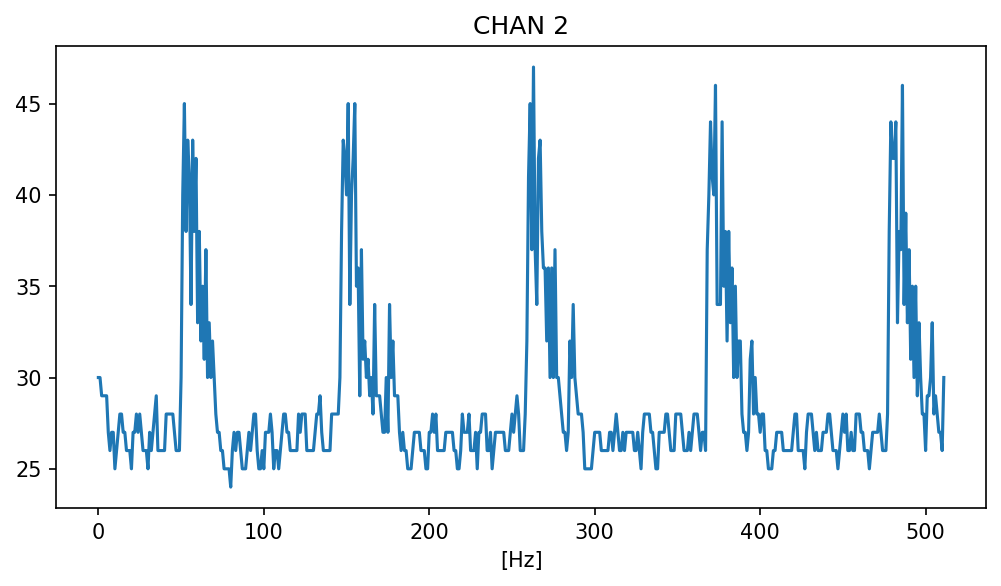

[]


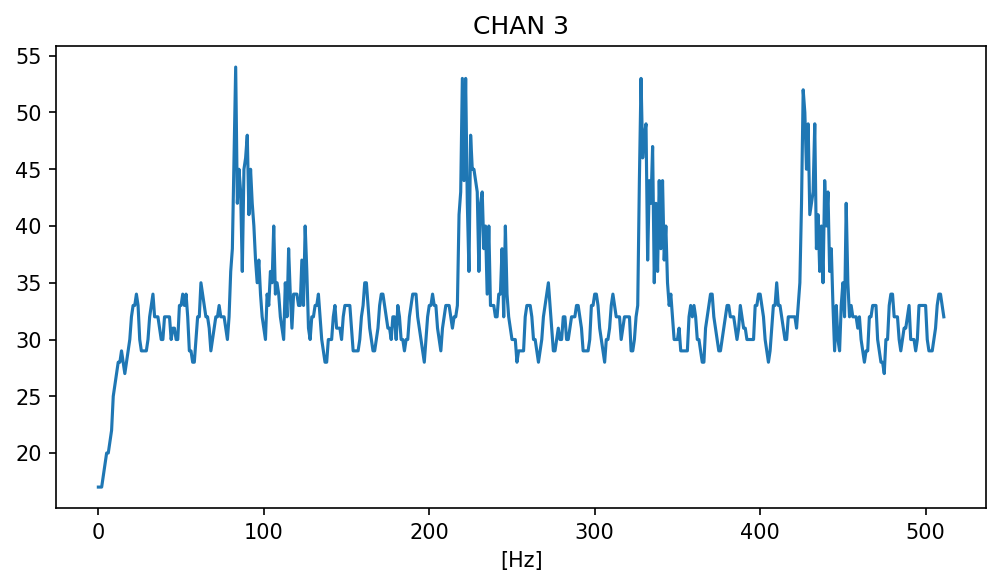

[]


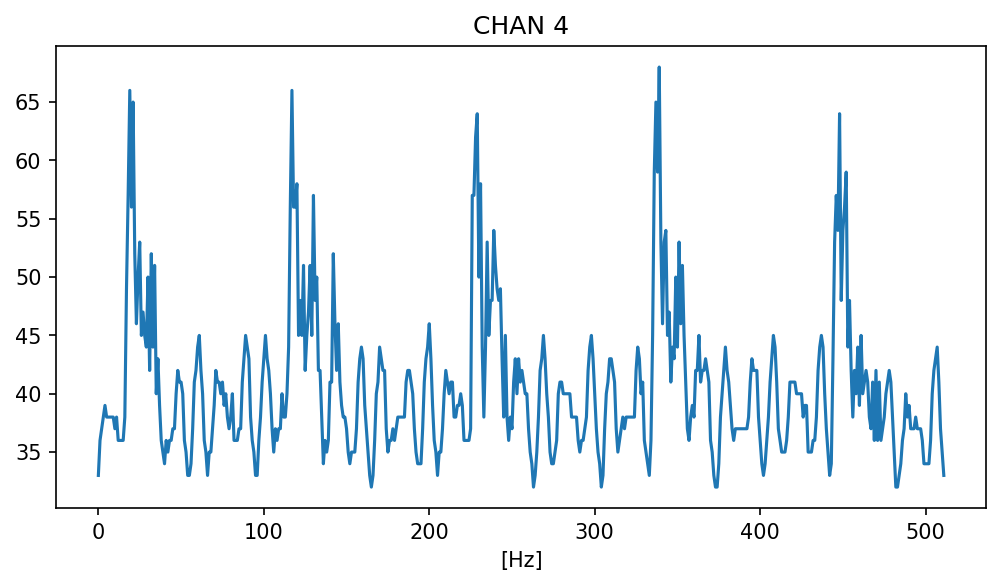

[]


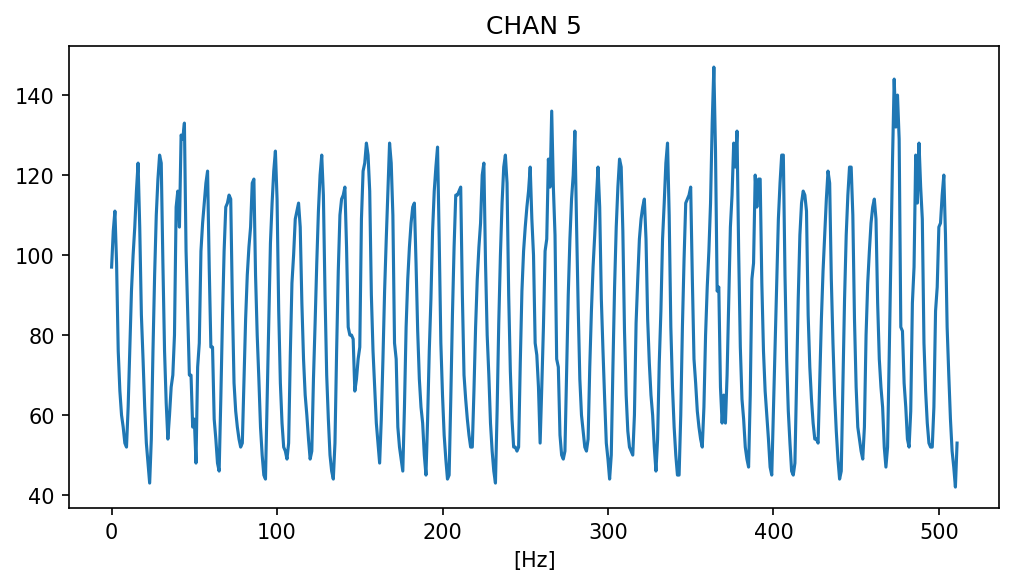

[28906.249999999996]


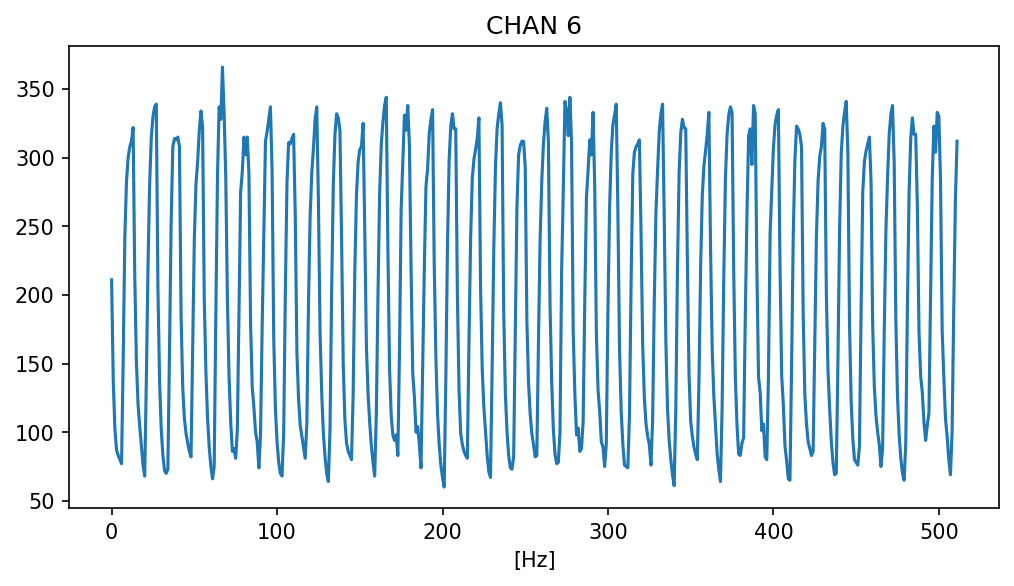

[2343.7499999999995, 3906.2499999999995, 28906.249999999996, 40624.99999999999, 85937.49999999999, 143749.99999999997]


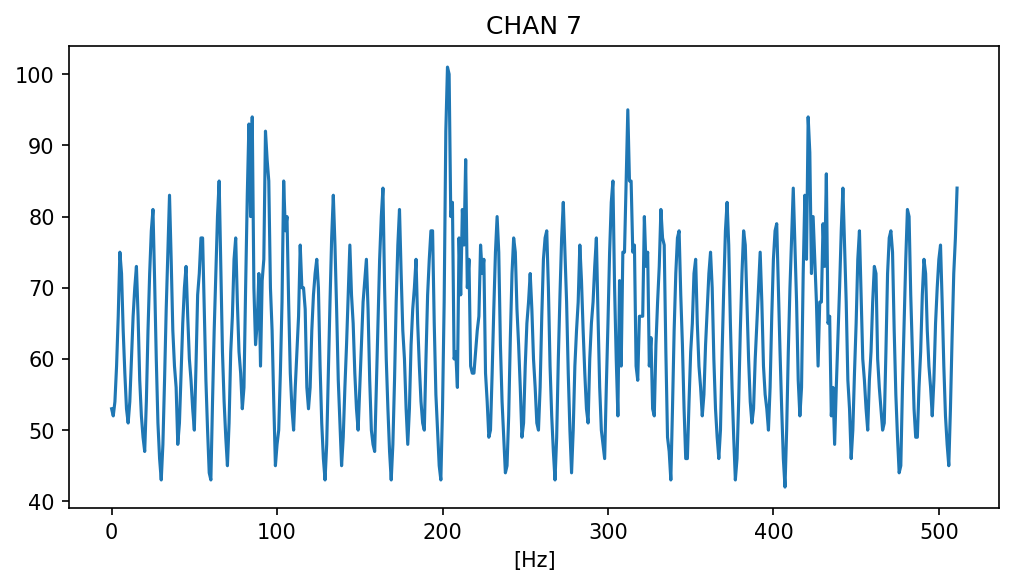

[40624.99999999999]


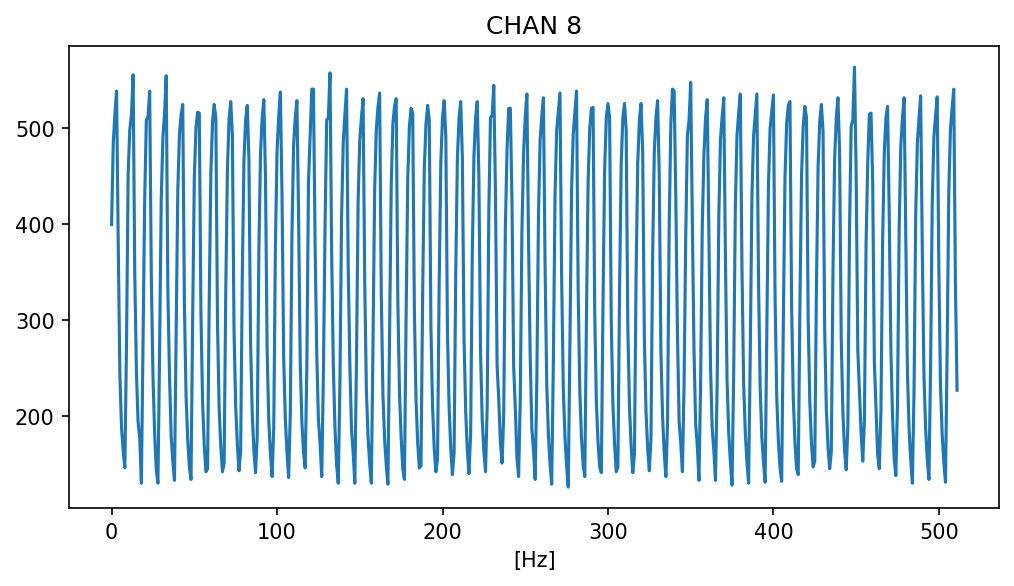

[2343.7499999999995, 3906.2499999999995, 40624.99999999999, 80468.74999999999, 121093.74999999999, 198437.49999999997]


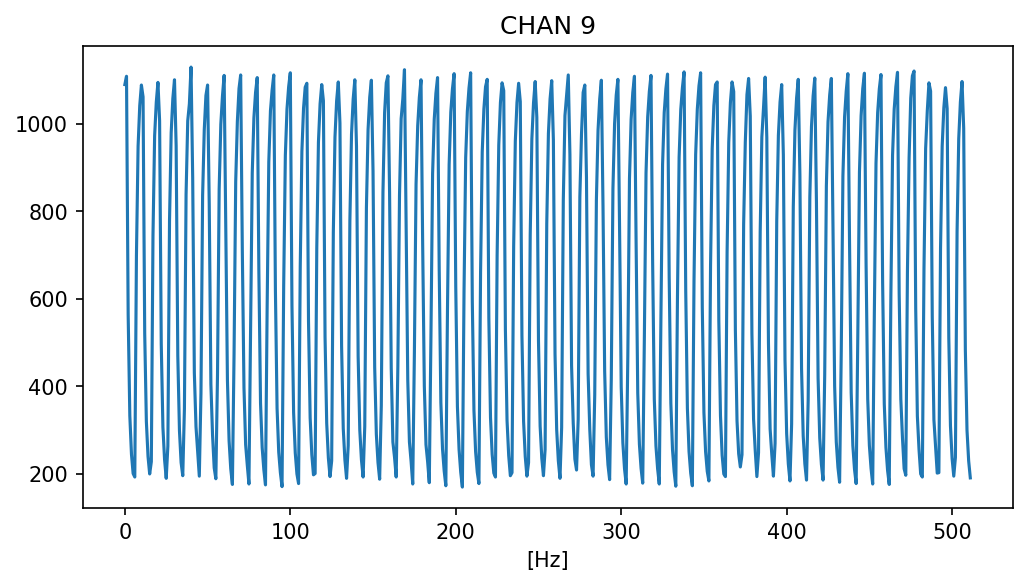

[2343.7499999999995, 3906.2499999999995, 5468.749999999999, 36718.74999999999, 40624.99999999999, 42968.74999999999, 80468.74999999999, 117968.74999999999, 121093.74999999999, 198437.49999999997]


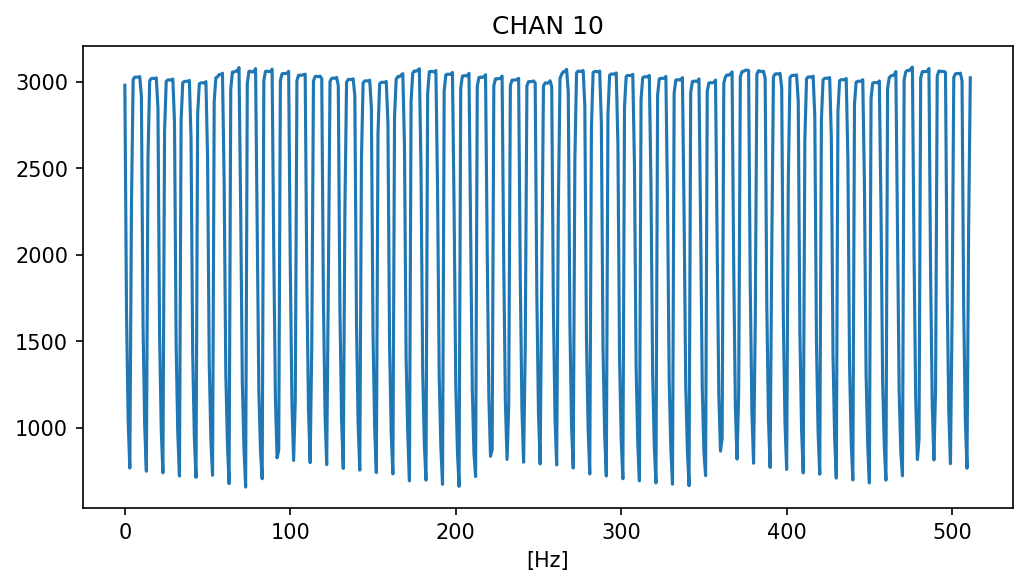

[2343.7499999999995, 3906.2499999999995, 5468.749999999999, 7031.249999999999, 8593.749999999998, 10156.249999999998, 37499.99999999999, 40624.99999999999, 42968.74999999999, 46093.74999999999, 77343.74999999999, 80468.74999999999, 82812.49999999999, 114843.74999999999, 117968.74999999999, 121093.74999999999, 124218.74999999999, 155468.74999999997, 157812.49999999997, 160937.49999999997, 164062.49999999997, 195312.49999999997, 198437.49999999997]


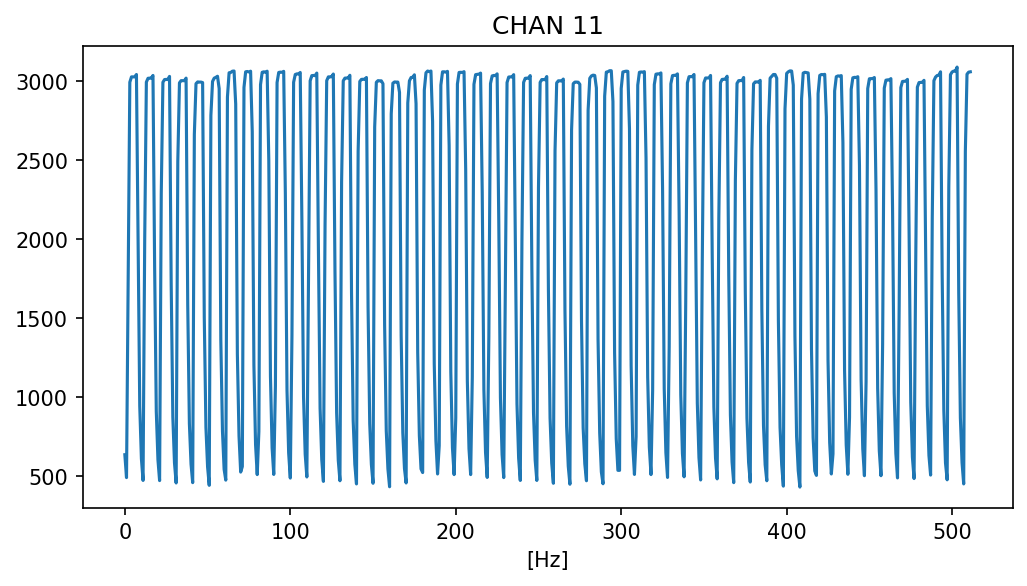

[2343.7499999999995, 3906.2499999999995, 5468.749999999999, 7031.249999999999, 8593.749999999998, 10156.249999999998, 11718.749999999998, 36718.74999999999, 40624.99999999999, 46093.74999999999, 77343.74999999999, 80468.74999999999, 82812.49999999999, 117968.74999999999, 121093.74999999999, 123437.49999999999, 155468.74999999997, 157812.49999999997, 161718.74999999997, 198437.49999999997]


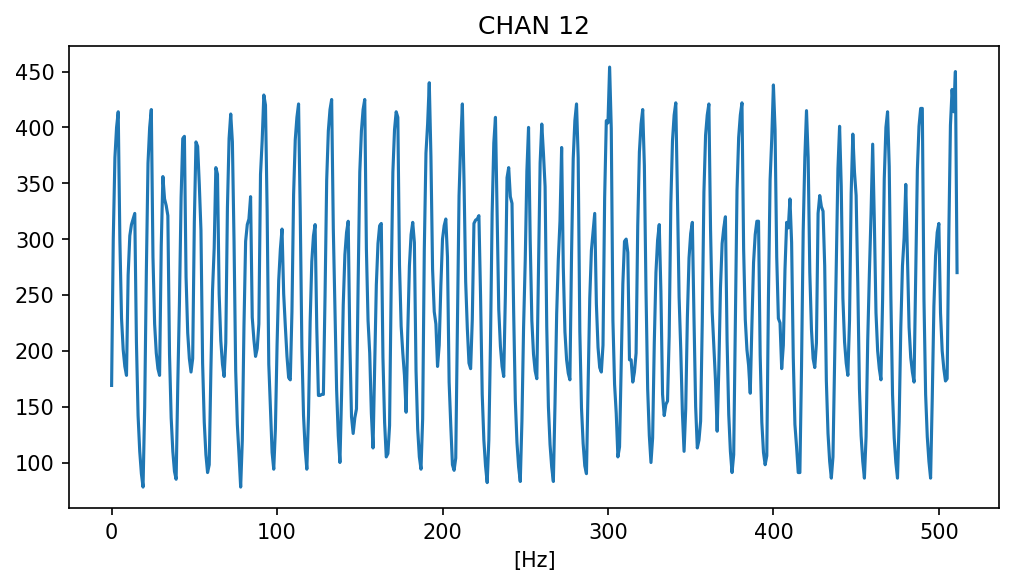

[2343.7499999999995, 19531.249999999996, 40624.99999999999, 57812.49999999999, 121093.74999999999]


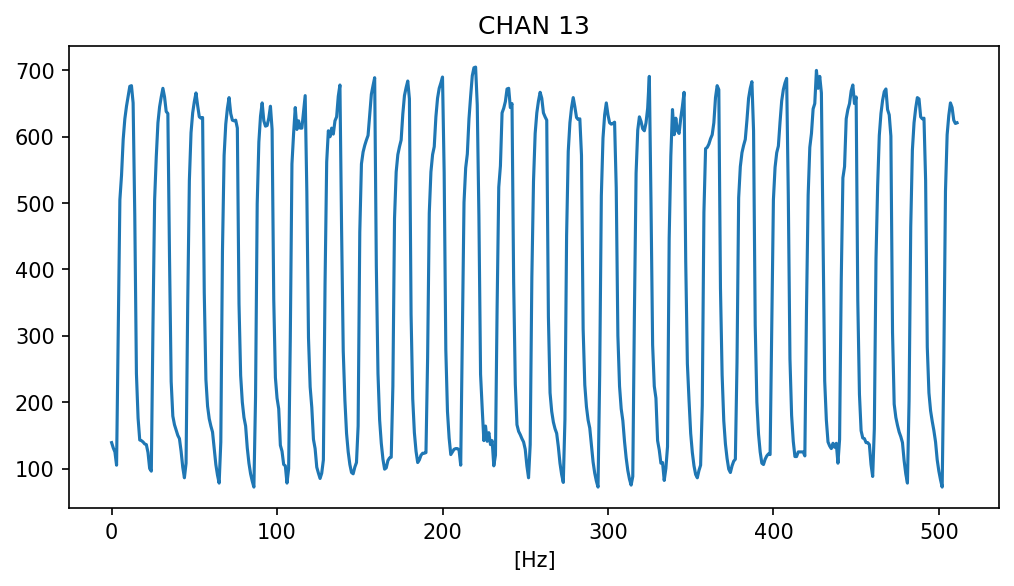

[2343.7499999999995, 3906.2499999999995, 19531.249999999996, 21874.999999999996, 38281.24999999999, 40624.99999999999, 57812.49999999999, 96093.74999999999, 134374.99999999997, 173437.49999999997]


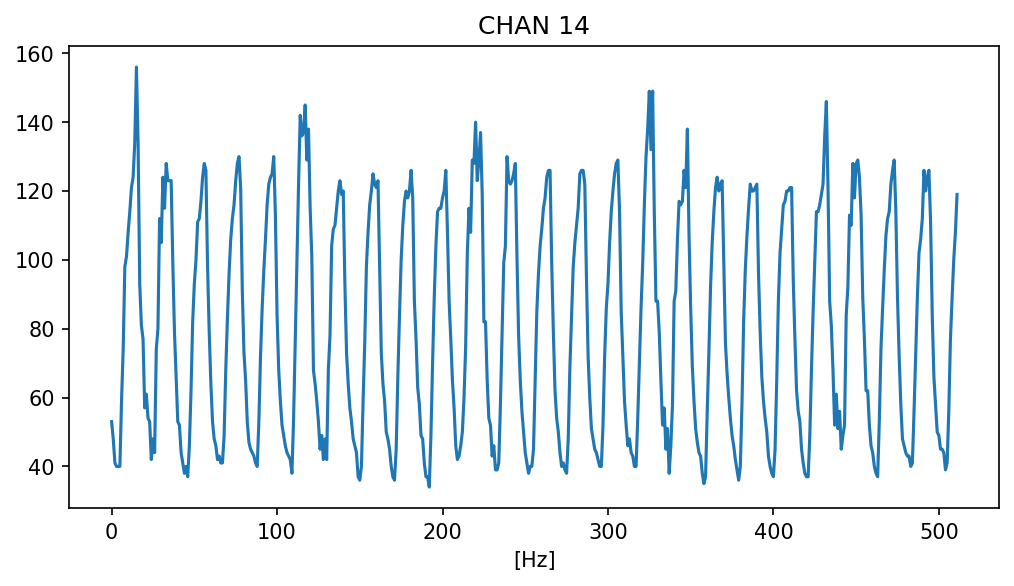

[19531.249999999996]


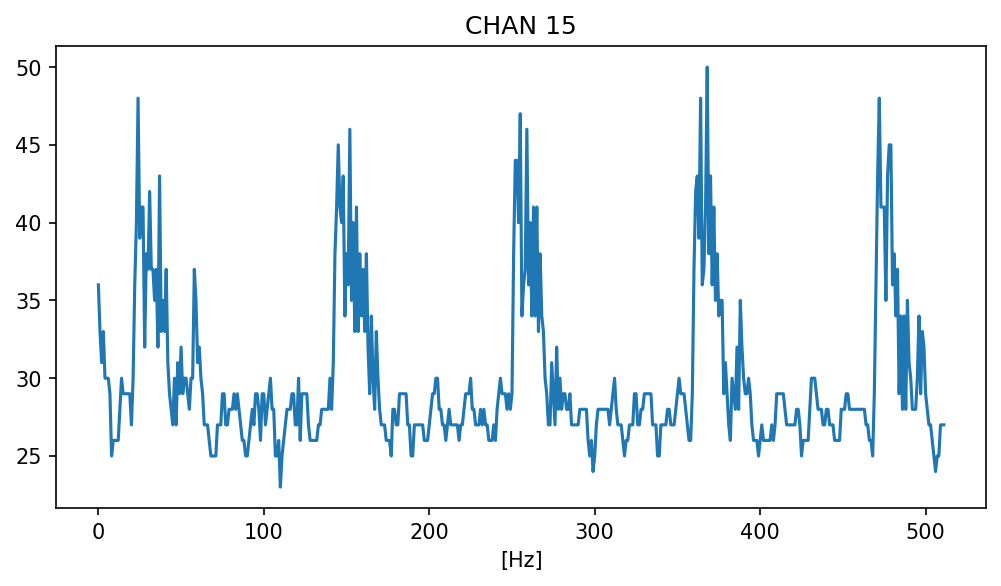

[]


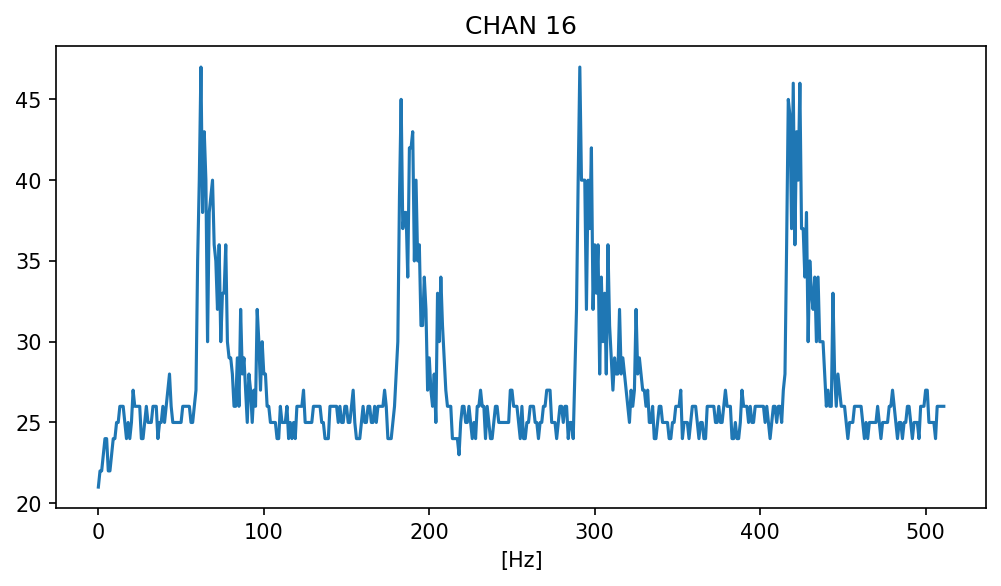

[]


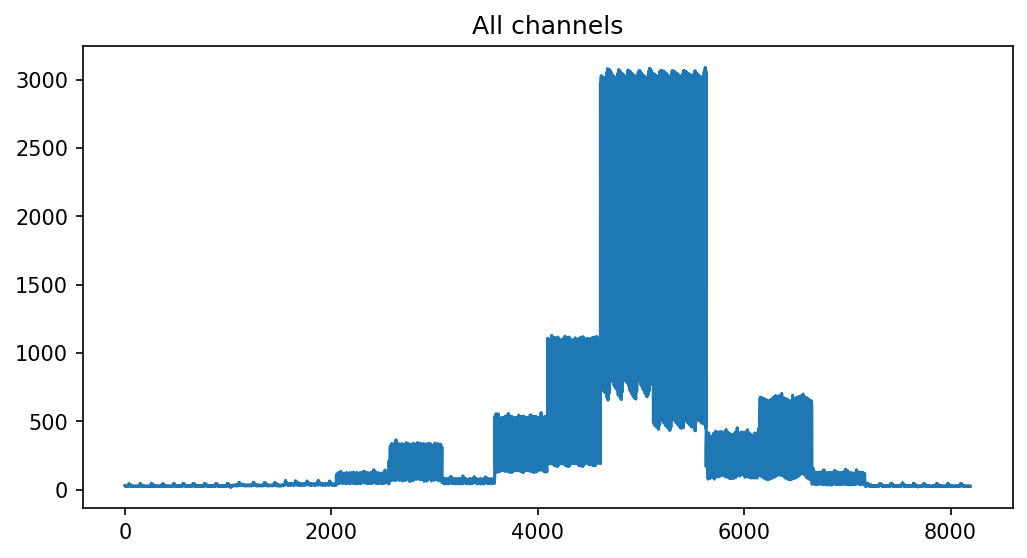

In [29]:
# Display binary dumps
# (gdb) dump binary memory result.bin 0x2001911C 0x2001D11C

import struct
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import rfft, rfftfreq
import numpy as np

plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (8, 4)

NUM_VALUES_CHAN = 512
NUM_CHANNELS = 16
NUM_VALUES = NUM_VALUES_CHAN * NUM_CHANNELS

BEGIN = NUM_VALUES_CHAN * 13

numbers = []

frequencies = rfftfreq(n=512, d=1/400000)

with open('result.bin', mode='rb') as f:
    data = struct.unpack(str(NUM_VALUES) + 'h', f.read())

    for i in range(NUM_CHANNELS):
        cut = np.array(data[NUM_VALUES_CHAN*i : NUM_VALUES_CHAN*(i+1)])
        windowed = cut * signal.windows.bartlett(len(cut))
        transformed = np.absolute(rfft(windowed)) # type: ignore
        plt.plot(cut)
        #plt.plot(frequencies, transformed)
        #plt.xticks(np.arange(0, frequencies.max(), 20000))
        #plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3), useMathText=True)
        plt.title('CHAN ' + str(i+1))
        plt.xlabel('[Hz]')
        plt.show()

        peaks, _ = signal.find_peaks(transformed, 1000)
        print([frequencies[p] for p in peaks])

plt.plot(data)
plt.title('All channels')
plt.show()

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.fftpack import fftshift

FREQ_SIGNAL = 4000 # Hz
FREQ_SAMPLE = 400000 # Hz
NUM_SAMPLES = 512 #

fig, axs = plt.subplots(2, 2, figsize=(32, 16), dpi=600)

t = np.linspace(0, (1/FREQ_SAMPLE)*NUM_SAMPLES, NUM_SAMPLES, endpoint=False)
zeitbereich = signal.square(2 * np.pi * FREQ_SIGNAL * t) + 1
bildbereich = np.absolute(fft(zeitbereich)) / len(zeitbereich) # type: ignore
frequencies = fftfreq(len(zeitbereich), 1/FREQ_SAMPLE)
axs[0][0].plot(t, zeitbereich)#np.absolute(bildbereich))
axs[0][1].plot(frequencies[:int(len(frequencies)/2) - 1], bildbereich[:int(len(bildbereich)/2) - 1])#np.absolute(bildbereich))

zeitbereich2 = signal.square(2 * np.pi * FREQ_SIGNAL * t) + 1
zeitbereich2 = zeitbereich2 * np.bartlett(512)
bildbereich2 = np.absolute(fft(zeitbereich2)) / len(zeitbereich2) # type: ignore
axs[1][0].plot(t, np.bartlett(NUM_SAMPLES) * zeitbereich)
axs[0][1].plot(frequencies[:int(len(frequencies)/2) - 1], bildbereich2[:int(len(bildbereich2)/2) - 1])

np.bartlett(NUM_SAMPLES)

plt.show()